# Assignment 6: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
# Ref & Self Notes:
# https://www.statology.org/pandas-unique-values-in-column/
# https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe
# https://stackoverflow.com/questions/58528989/pandas-get-unique-values-from-column-of-lists
# https://towardsdatascience.com/valuable-data-analysis-with-pandas-value-counts-d87bbdf42f79
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/2/ch02lvl1sec32/controlling-a-fill-pattern
# https://www.python-graph-gallery.com/84-hexbin-plot-with-matplotlib


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [3]:

#df.info()
# print(df)

######################################

#df.value_counts()

######################################

print("\n Number of Rows: ", len(df))



 Number of Rows:  701349


How many North Atlantic hurricanes are in this dataset?

In [4]:

# Self Notes:

#df.count()
#df.loc[3]
#print(df[NA])

#df.LAT > 10

#(df.LAT > 10)

#gg = (df.LAT > 10) & (df.LON > 10)
#gg.head()

#df[(df.LAT > 10)]

# -----------------------------------------------------------

# df.BASIN

# print(df.BASIN)

#############################################################

#df[(df.BASIN == "NA")].value_counts()
#df.BASIN[2:9].value_counts()

#df["BASIN"].value_counts()

print("BASIN: ", df["BASIN"].value_counts()[2:3])

############################################################


hurricane_NA = df[(df.BASIN == "NA")]

hurricane_NA

print("\nNORTH ATLANTIC HURRICANES: ", len(hurricane_NA))


BASIN:  NA    123503
Name: BASIN, dtype: int64

NORTH ATLANTIC HURRICANES:  123503


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [5]:
# HINT: DF GROUPBY
"""
df.groupby("BASIN").SID.count()

df.groupby("BASIN").SID.nunique()

df.groupby("BASIN").SID.nunique().plot(kind = "bar")

gb = df.groupby("BASIN")
gb_SID = gb.SID
unique_per_basin = gb_SID.nunique()
plotted = unique_per_basin.plot(kind = "bar")

""" """
basin = df.BASIN.unique()

basin.sort()

basin
""" """
df = pd.DataFrame({'A':[1,1,3,2,6,2,8]})
a = df['A'].unique()
print(sorted(a))

for col in df:
    print(df[col].unique())
"""

#df.BASIN.unique()
#len(df.BASIN.unique())
#df.BASIN.nunique()
#df["BASIN"].nunique()
#df["BASIN"]
#df.BASIN
#len(df.BASIN.unique())

"""
for i in df:
    print(df["BASIN"].unique())
"""
#--------------------------------------------------------------------------------------------------

df.loc[: "BASIN"]

print("UNIQUE VALUES: \n",  "\n BASIN: (", df["BASIN"].nunique(), " total )", df["BASIN"].unique())

###################################################################################################

df.loc[: "SUBBASIN"]

print("\n SUBBASIN: (", df["SUBBASIN"].nunique(), "total )", df["SUBBASIN"].unique())

###################################################################################################

df.loc[: "NATURE"]

print("\n NATURE: (", df["NATURE"].nunique(), "total )",  df["NATURE"].unique())



UNIQUE VALUES: 
 
 BASIN: ( 7  total ) ['NI' 'SI' 'NA' 'EP' 'WP' 'SP' 'SA']

 SUBBASIN: ( 9 total ) ['BB' 'AS' 'MM' 'GM' 'NA' 'CS' 'WA' 'EA' 'CP']

 NATURE: ( 6 total ) ['NR' 'TS' 'ET' 'SS' 'MX' 'DS']


### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [6]:

df.rename(columns = {"WMO_WIND" : "WIND", "WMO_PRES" : "PRES"}, inplace = True)
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [7]:

df.WIND.nlargest(10)


665303    185.0
665301    180.0
665305    180.0
426786    165.0
178210    160.0
178211    160.0
178213    160.0
481224    160.0
551609    160.0
604896    160.0
Name: WIND, dtype: float64

You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

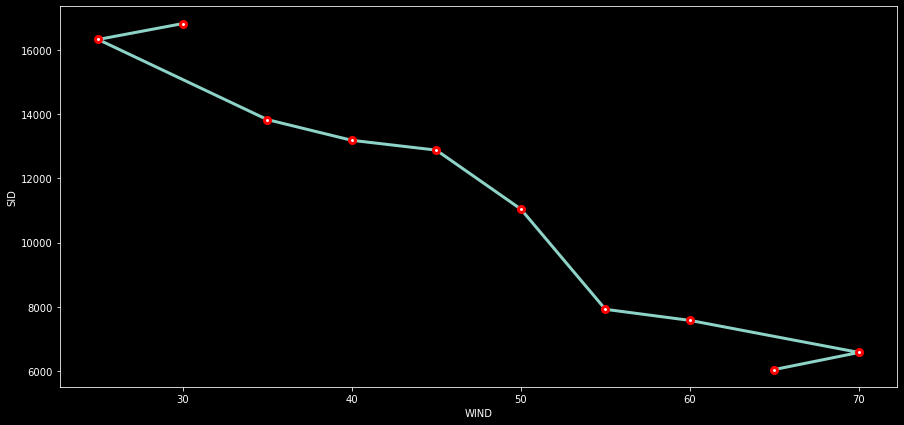

In [8]:

"""
markeredgecolor or mec color
markeredgewidth or mew float
markerfacecolor or mfc color
markerfacecoloralt or mfcalt color
"""

####################################################################

plt.style.use('dark_background')

df.groupby("WIND").SID.count().nlargest(10).plot( kind = "line",
                                                 marker = "o", 
                                                 mec = "red", 
                                                 mew = 3, 
                                                 lw = 3, 
                                                 mfc = "white", 
                                                 figsize = (15, 7), 
                                                 ylabel = "SID");
                                                #grid = True);


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

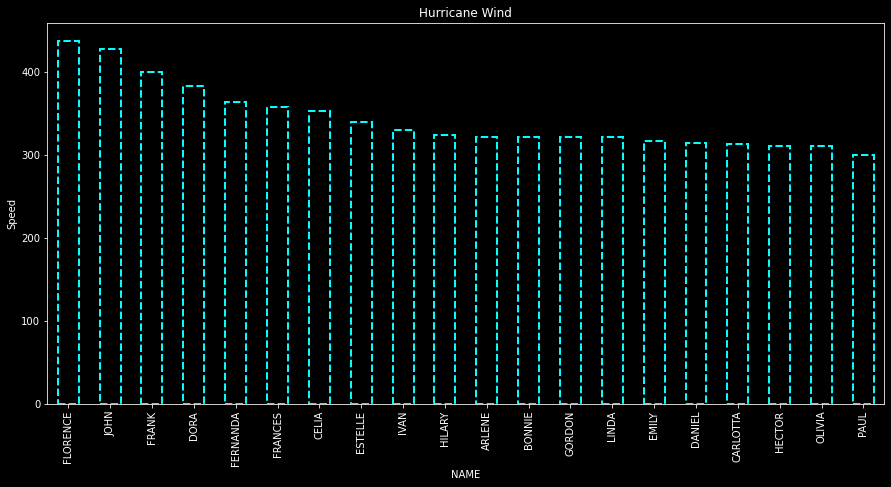

In [9]:

plt.style.use('dark_background')

df.groupby("NAME").WIND.count().nlargest(20).plot( kind = "bar", 
                                                  lw = 2, 
                                                  figsize = (15, 7), 
                                                  ylabel = "Speed", 
                                                  linestyle = "--", 
                                                  edgecolor = "cyan", 
                                                  color = "k", 
                                                  title = "Hurricane Wind");


### 6) Plot the count of all datapoints by Basin

as a bar chart

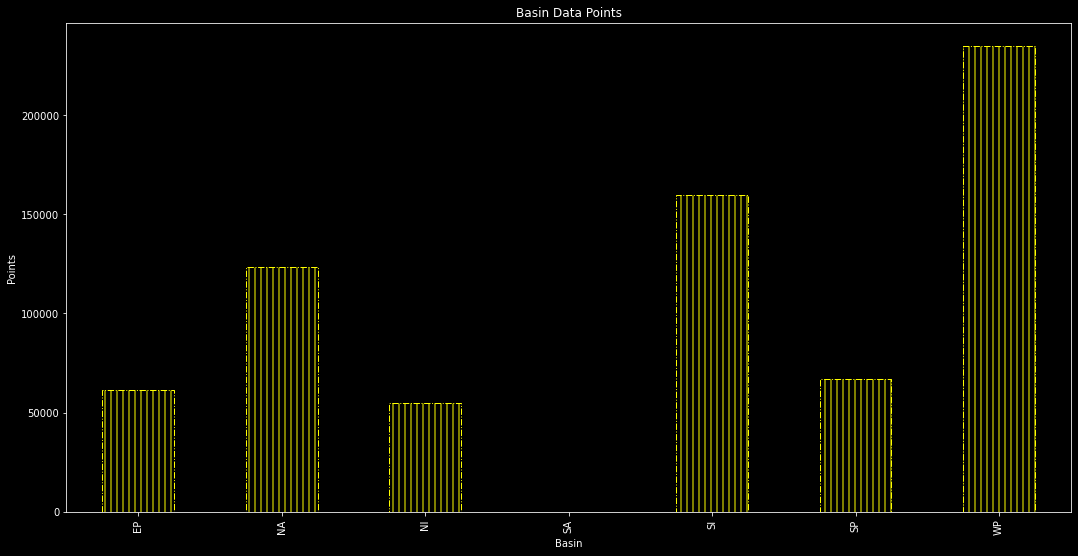

In [10]:

# df["BASIN"].value_counts()
# df["BASIN"].value_counts()[2:3]

#######################################################################

plt.style.use('dark_background')
df.groupby("BASIN").BASIN.count().plot(kind = "bar", 
                                       lw = 1, 
                                       figsize = (18, 9), 
                                       ylabel = "Points", 
                                       hatch = "||",
                                       xlabel = "Basin", 
                                       linestyle = "-.", 
                                       edgecolor = "yellow",
                                       color = "k", 
                                       title = "Basin Data Points");


### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

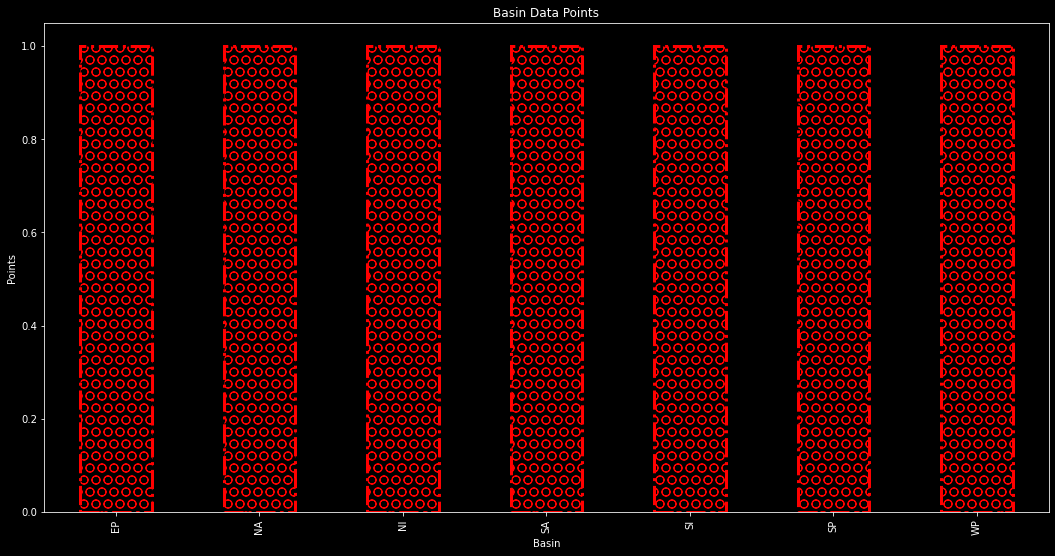

In [11]:

# df["BASIN"].value_counts()
# df["BASIN"].value_counts()[2:3]

#######################################################################

plt.style.use('dark_background')
df.groupby("BASIN").BASIN.nunique().plot(kind = "bar", 
                                         lw = 3, 
                                         figsize = (18, 9), 
                                         ylabel = "Points", 
                                         xlabel = "Basin", 
                                         hatch = "O", 
                                         linestyle = "-.", 
                                         edgecolor = "red", 
                                         color = "k", 
                                         title = "Basin Data Points");


### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

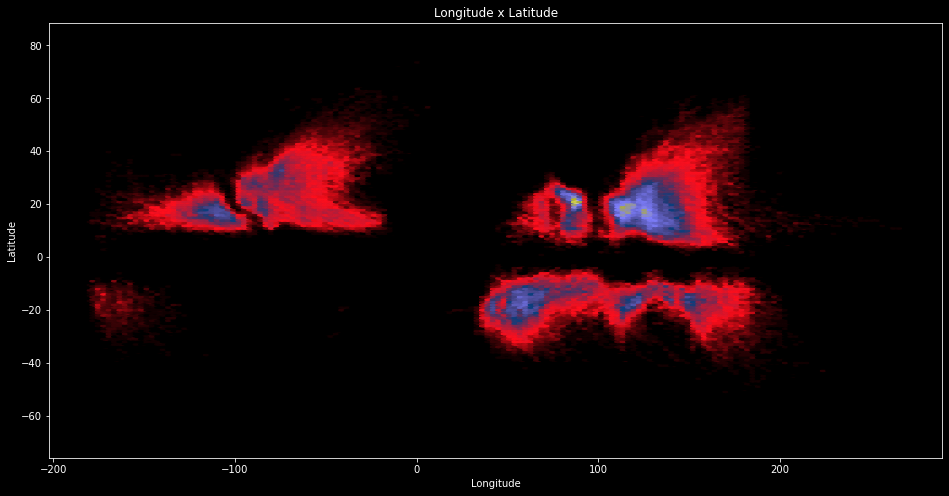

In [31]:

"""
plt.style.use('dark_background')
x = df.LON
y = df.LAT
df.plot(x,y,kind = "hexbin", gridsize = 50);
"""

########################################################

x = df.LON
y = df.LAT

plt.figure(figsize = (16, 8))
plt.hexbin(x, y, gridsize = (150, 150), cmap = "gist_stern") 
# plt.scatter(x,y, s=2, c="white")
plt.title('Longitude x Latitude') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show() 


### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [13]:

df.groupby("NAME"); gb = df.groupby("NAME"); gb.get_group("KATRINA"); kat = gb.get_group("KATRINA")

print(kat.head())

#################################################################################################################

df.groupby("SID"); gb = df.groupby("SID"); gb.get_group("2005236N23285"); katCane = gb.get_group("2005236N23285")

print(katCane.head())

#################################################################################################################

katrina = df[df.SID == "2005236N23285"]
katrina



                  SID  SEASON  NUMBER BASIN SUBBASIN     NAME  \
332138  1967242N18253    1967      85    EP       MM  KATRINA   
332139  1967242N18253    1967      85    EP       MM  KATRINA   
332140  1967242N18253    1967      85    EP       MM  KATRINA   
332141  1967242N18253    1967      85    EP       MM  KATRINA   
332142  1967242N18253    1967      85    EP       MM  KATRINA   

                  ISO_TIME NATURE      LAT      LON  WIND  PRES  
332138 1967-08-30 00:00:00     TS  17.8000 -107.200  45.0   NaN  
332139 1967-08-30 03:00:00     TS  17.9859 -107.596   NaN   NaN  
332140 1967-08-30 06:00:00     TS  18.2120 -107.990  45.0   NaN  
332141 1967-08-30 09:00:00     TS  18.5131 -108.386   NaN   NaN  
332142 1967-08-30 12:00:00     TS  18.9000 -108.800  45.0   NaN  
                  SID  SEASON  NUMBER BASIN SUBBASIN     NAME  \
602895  2005236N23285    2005      61    NA       NA  KATRINA   
602896  2005236N23285    2005      61    NA       NA  KATRINA   
602897  2005236N23

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
602895,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
602896,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
602897,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
602898,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
602899,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
602954,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
602955,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
602956,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
602957,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


In [14]:

#ff = []
#gg = []
#for i in df:
#    if i == "2005236N23285":
#        ff.append(i)
        
#for j in df.NAME:
#    if j == "KATRINA":
#        gg.append(j)
        
#print(ff)
#print(gg)
    
#ff = []
#gg = []
#for i in df:
#   if i == "602895":
#        ff.append(i)
        
#for j in df.NAME:
#    if j == "KATRINA":
#        gg.append(j)
        
#print(ff)
#print(gg)


In [15]:

#df.iloc[500]

kat5 = df[df["NAME"].str.upper().str.contains("KATRINA").fillna(False) & (df.SEASON == 2005)]

kat5


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
602895,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
602896,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
602897,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
602898,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
602899,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
602954,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
602955,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
602956,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
602957,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


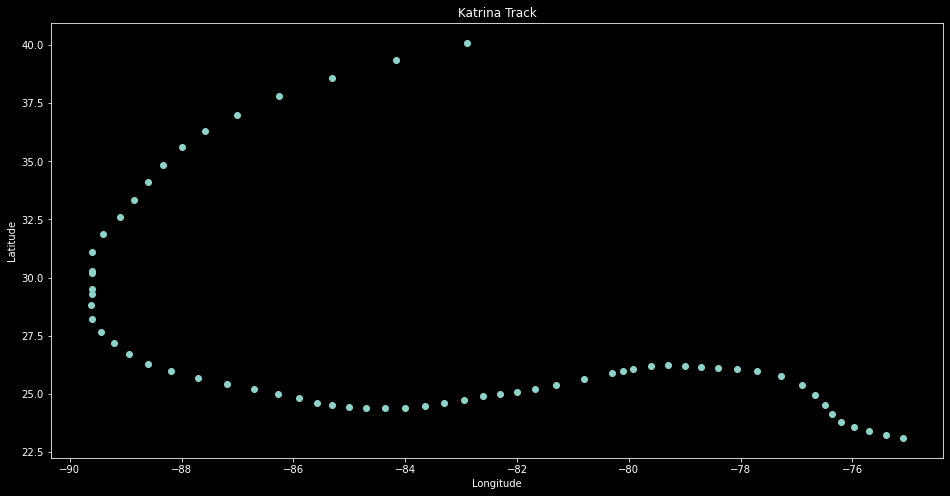

In [30]:

latY = kat5.iloc[:,8]
lonX = kat5.iloc[:,9]

#print(xx)
#print(yy)

plt.figure(figsize = (16, 8))
plt.scatter(lonX, latY) 
plt.title('Katrina Track') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show() 


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

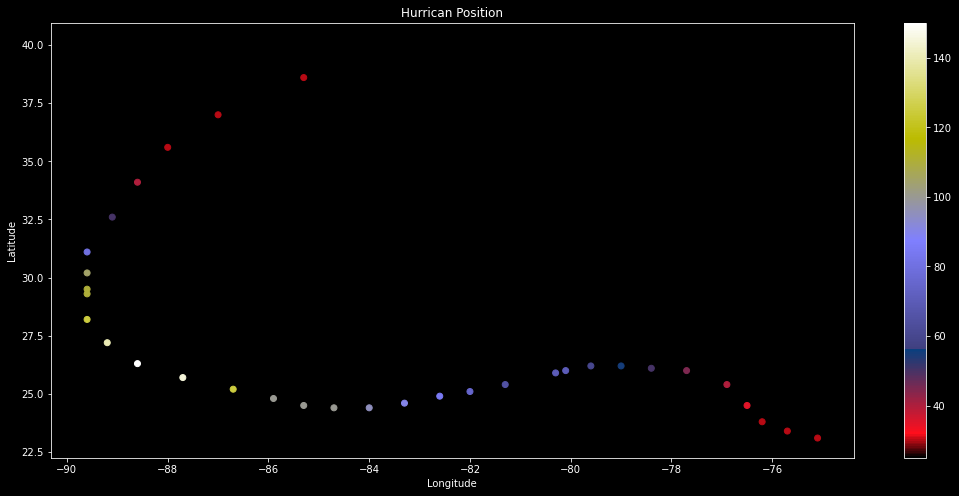

In [29]:

wind = kat5.iloc[:,10]

plt.figure(figsize = (18, 8))
plt.scatter(lonX, latY, cmap = "gist_stern", c = wind) 
plt.title('Hurrican Position') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show() 


### 10) Make time the index on your dataframe

In [18]:

df = df.set_index("ISO_TIME")

df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

In [20]:

"""
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')

timeseries = pd.Series( np.sin ( 2 *np.pi *two_years.dayofyear / 365 ),
                       index=two_years )
timeseries.plot()
"""

##########################

tsYear = df.resample('Y')

tsYear

#df.head()


### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

In [24]:

NA5 = df[df["BASIN"].str.upper().str.contains("NA").fillna(False) & (df.SEASON == 2005)]

NA5


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
2005-06-08 18:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,16.9000,-84.0000,25.0,1004.0
2005-06-08 21:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.1200,-83.9425,NaN,NaN
2005-06-09 00:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.4000,-83.9000,30.0,1003.0
2005-06-09 03:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.7775,-83.8850,NaN,NaN
2005-06-09 06:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,18.2000,-83.9000,35.0,1003.0
...,...,...,...,...,...,...,...,...,...,...,...
2006-01-07 06:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.2000,-52.7000,25.0,1012.0
2006-01-07 09:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.4249,-53.4364,NaN,NaN
2006-01-07 12:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.8000,-54.2000,25.0,1014.0


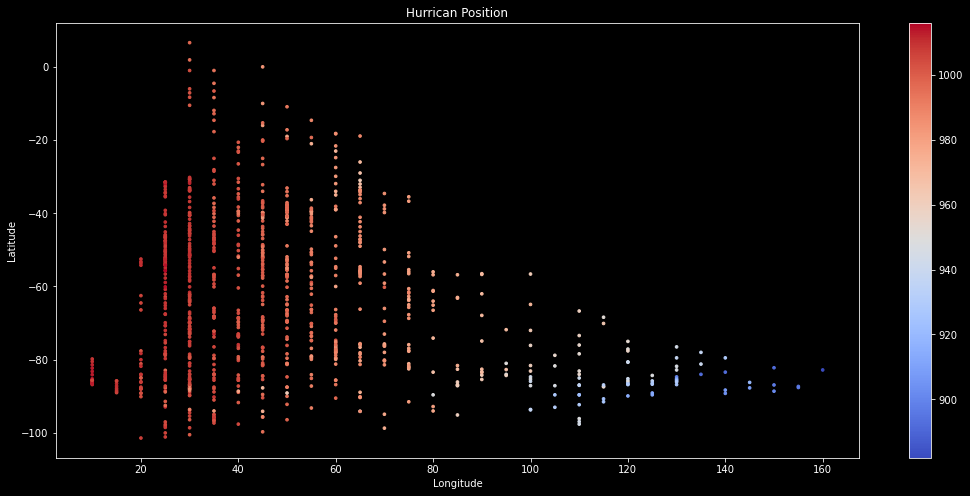

In [48]:

latY = NA5.iloc[:,8]
lonX = NA5.iloc[:,9]
wind = NA5.iloc[:,10]

plt.figure(figsize = (18, 8))
plt.scatter(lonX, latY, cmap = "coolwarm", s = 7, c = wind) 
plt.title('Hurrican Position') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show() 


### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [80]:
NA7 = df[df["BASIN"].str.upper().str.contains("NA").fillna(False) & (df.SEASON == 1970)]

NA7


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5750,-79.0676,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.7000,-79.2000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9000,-79.4349,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1970-10-28 00:00:00,1970294N34312,1970,137,NA,NA,NaN,TS,40.0000,-31.5000,60.0,NaN
1970-10-28 03:00:00,1970294N34312,1970,137,NA,NA,NaN,TS,40.8070,-30.4946,NaN,NaN
1970-10-28 06:00:00,1970294N34312,1970,137,NA,NA,NaN,TS,42.1000,-29.1000,60.0,NaN


In [92]:
print(len(NA7))

#NA7.SID

903


In [82]:
NA7.iloc[0,:]

SID         1970138N12281
SEASON               1970
NUMBER                 43
BASIN                  NA
SUBBASIN               CS
NAME                 ALMA
NATURE                 TS
LAT                  11.5
LON                 -79.0
WIND                 25.0
PRES                  NaN
Name: 1970-05-17 18:00:00, dtype: object

### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

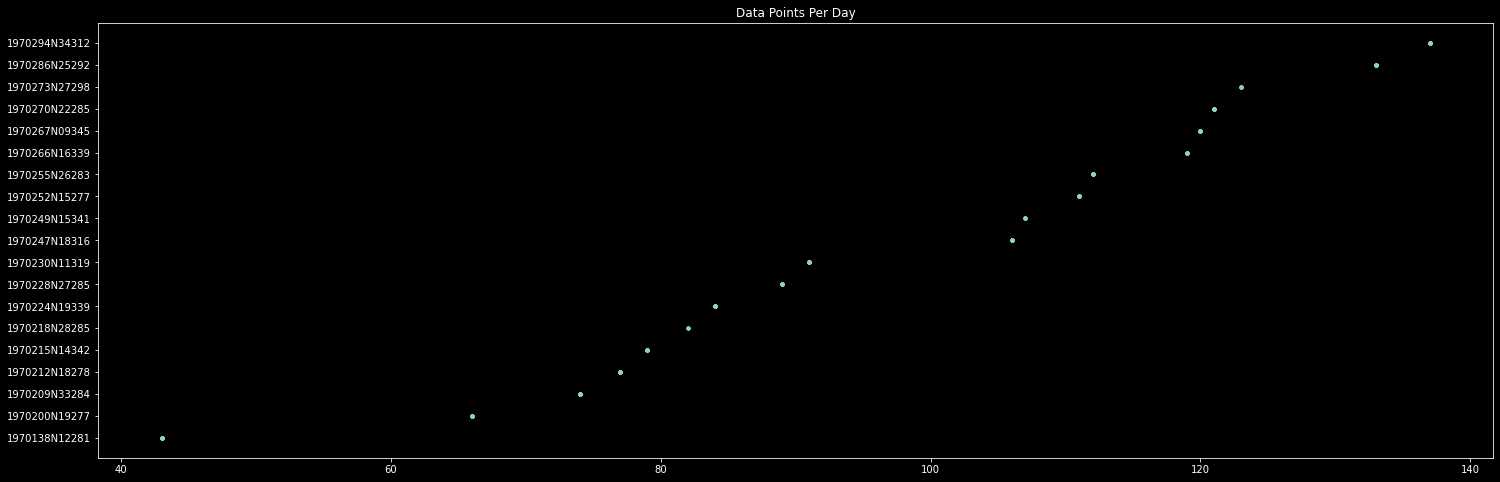

In [107]:

ti = NA7.iloc[:,0]
nam = NA7.iloc[:,2]

#ti = NA7.SID
#nam = NA7.NUMBER

# NA7.ISO_TIME
# ti = NA7.iloc[0,:]
# le = len(NA7)

plt.figure(figsize = (25, 8))
plt.scatter(nam, ti, cmap = "coolwarm", s = 7)#, c = wind) 
plt.title('Data Points Per Day') 
#plt.xlabel("Longitude")
#plt.ylabel("Latitude")
plt.show() 


### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

In [123]:

na = NA7.mean().count()
na7 = NA7.std().count()

print("\n", na)

print("\n", na7)





 6

 6


/tmp/ipykernel_738/390110887.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  na = NA7.mean().count()
/tmp/ipykernel_738/390110887.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  na7 = NA7.std().count()


<AxesSubplot:>

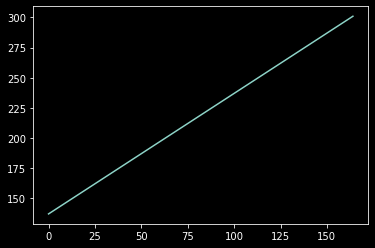

In [161]:
"""
two_years = pd.date_range(start = '1970-05-17 ', end = '1970-10-28', freq = 'D')

timeseries = pd.Series(two_years.dayofyear / 365, index = two_years )

timeseries.plot()

#########################################################


df_mm = NA7.resample('D').mean()
df_mm[["NUMBER", "NUMBER"]].plot()

"""

##########################################################


sr = pd.Series(pd.date_range(start = '1970-05-17 ', end = '1970-10-28', freq = 'D'))

#sr.index = na
  
d = sr.dt.dayofyear
  
d.plot()


### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

In [168]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = df.groupby(df.index.month).transform(standardize)
anomaly.plot(y = NA7)

/tmp/ipykernel_738/623730255.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  anomaly = df.groupby(df.index.month).transform(standardize)


ValueError: Boolean array expected for the condition, not object

Which years stand out as having anomalous hurricane activity?